<a href="https://colab.research.google.com/github/abhishek9039/ML-LAB/blob/main/Abhishek_Sharma_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CO CST IMPLEMENTATION OF NEURAL NETWORK



# Tutorial 3: Neural Network Classification

Dataset: [Pima Indian Diabetes Dataset](https://data.world/data-society/pima-indians-diabetes-database#)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Attributes of PIMA dataset:

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1)

**1. Mount the Google Drive**

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Move to the place where data resides**

In [51]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [52]:
!ls

'0827CT191003_linux_lab_work(3).docx'
 0827CT191003.pdf
 0827CT191003.png
'3 6 20'
'Abhishek Sharma (0827CT191003).pdf'
'ABHISHEK SHARMA ( 0827CT191003).pdf'
'Abhishek sharma (9039180217).pdf'
'Abhishek Sharma CT-03 ADA assignment.docx'
'Abhishek Sharma(CT 03 ).pdf'
'Abhishek Sharma CT-03 TOC Lab Manual (2).gdoc'
'Abhishek Sharma CT-03 TOC Lab Manual.gdoc'
'Abhishek Sharma dbms (ct-03).gdoc'
'abhisheksharma_ introduction to cloud.pdf'
'Abhishek Sharma IWT assig-2021'
'Abhishek Sharma linux assigment CT-03.gdoc'
 abhisheksharma_python.pdf
'abstract alexa (1).txt'
'abstract alexa (2).txt'
'abstract alexa.txt'
'AITR - Code Chef Ids of 3rd Year.xlsx'
'Alexa  (1).png'
'Alexa  (2).png'
'Alexa .png'
'Alexa skill link (1).txt'
'Alexa skill link.txt'
 Classroom
'Colab Notebooks'
'COMPUTER  WORKSHOP ASSIGNMENT.docx'
'COMPUTER WORKSHOP PRACTICALS.docx'
'Copy of dataset1 (1).csv'
'Copy of Format of Synopsis.gdoc'
 custom_trainvalacc.png
 custom_trainvalloss.png
'cyber 03'
 Cybersecurity_Foundation

**3. Read the dataset from CSV file**

In [53]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [54]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [55]:
data.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

**4. Store the data into input feature and label variables**

In [56]:
dataset= data.values
X = dataset[:,0:8]
Y = dataset[:,8]
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

**5. Data Normalization**

In [57]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

**6. One-hot vector conversion**

In [58]:
from keras.utils import np_utils
encoded_y = np_utils.to_categorical(Y)
encoded_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

**7. Split the dataset into training, testing and validation set**

In [59]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(X_scale, encoded_y, test_size=0.4, random_state=20)
X_training, X_valid, Y_training, Y_valid = train_test_split(X_training, Y_training, test_size=0.4, random_state=20)
print(len(X_training))
print(len(X_testing))
print(len(X_valid))

276
308
184


**8. Model Creation**

In [60]:
from keras.models import Sequential
from keras.layers import Dense

# Creating the model
model = Sequential()
model.add(Dense(26, input_shape=(8,), activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()   #gives a summary of the model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 26)                234       
                                                                 
 dense_31 (Dense)            (None, 28)                756       
                                                                 
 dense_32 (Dense)            (None, 10)                290       
                                                                 
 dense_33 (Dense)            (None, 4)                 44        
                                                                 
 dense_34 (Dense)            (None, 2)                 10        
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


**9. Model Compile**

In [61]:
from tensorflow.keras import optimizers
opt=optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

**10. Model Training**

if you have 1000 training examples, and your batch size is  500, then it will take 2 iterations to complete 1 epoch.

In [62]:
hist = model.fit(X_training, Y_training,batch_size=4,  epochs=100, validation_data=(X_valid,Y_valid))

Epoch 1/100
69/69 [==============================] - 1s 5ms/step - loss: 0.6529 - accuracy: 0.6594 - val_loss: 0.6681 - val_accuracy: 0.6087
Epoch 2/100
69/69 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6739 - val_loss: 0.6519 - val_accuracy: 0.6087
Epoch 3/100
69/69 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6739 - val_loss: 0.6465 - val_accuracy: 0.6087
Epoch 4/100
69/69 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.6739 - val_loss: 0.6573 - val_accuracy: 0.6087
Epoch 5/100
69/69 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.6848 - val_loss: 0.6095 - val_accuracy: 0.6304
Epoch 6/100
69/69 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.6957 - val_loss: 0.6533 - val_accuracy: 0.6033
Epoch 7/100
69/69 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7138 - val_loss: 0.5844 - val_accuracy: 0.7011
Epoch 8/100
6

**11. Plot the training loss and accuracy**

<Figure size 432x288 with 0 Axes>

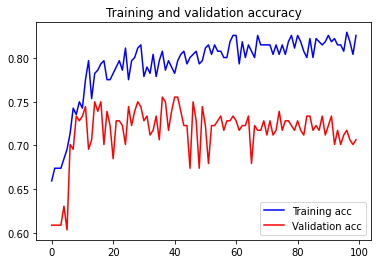

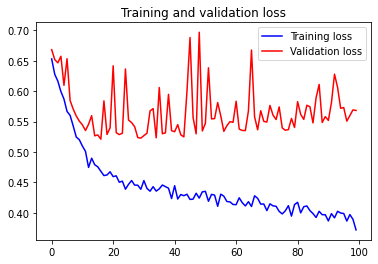

<Figure size 432x288 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt 
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('custom_trainvalacc.png')
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
#plt.show()
plt.savefig('custom_trainvalloss.png')
plt.figure()

**12. Evaluate the performance**

In [64]:
res =model.evaluate(X_testing, Y_testing)

10/10 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.7695


**13. Predict on new datatset**


In [65]:
test=X_testing[0]
y_act=Y_testing[0]
result=model.predict(test.reshape(1,8))
result

array([[0.4283385, 0.5716614]], dtype=float32)

In [66]:
import numpy as np
y_pred = np.round(result)
print("Actual:"+ str(y_act))
print("Predicted:"+str(y_pred))

Actual:[0. 1.]
Predicted:[[0. 1.]]


**Reference:** - https://keras.io/